In [1]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=368d1fc1591ec41601443dff0d43af22a27d4e536e075b1f60b27c4019a85c14
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import copy
fake_old = copy.deepcopy(fake)

#Carregar os datasets com apenas o conteudo textual das mensagens e seus rotulos. Os datasets escolhidos são o FakeWhatsAppBr, Fakepedia, Fake news multilabel e o FakeTrue.br.


In [ ]:
import pandas as pd
formated_fakewhatsappbr = pd.read_csv("drive/MyDrive/fakeWhatsApp.BR_2018.csv").iloc[:, -2:]
#formated_fakewhatsappbr["origin"] = "fakewhatsappbr"
formated_fakewhatsappbr

<ipython-input-3-4859d1e619f4>:2: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  formated_fakewhatsappbr = pd.read_csv("drive/MyDrive/fakeWhatsApp.BR_2018.csv").iloc[:, -2:]


,text,misinformation,origin
0,<Arquivo de mídia oculto>,-1,fakewhatsappbr
1,O Bolsonaro tem que estar preparado pra respon...,-1,fakewhatsappbr
2,<Arquivo de mídia oculto>,-1,fakewhatsappbr
3,Boaaa,-1,fakewhatsappbr
4,<Arquivo de mídia oculto>,-1,fakewhatsappbr
...,...,...,...
282596,<Arquivo de mídia oculto>,-1,fakewhatsappbr
282597,<Arquivo de mídia oculto>,-1,fakewhatsappbr
282598,<Arquivo de mídia oculto>,-1,fakewhatsappbr
282599,<Arquivo de mídia oculto>,-1,fakewhatsappbr


In [ ]:
import pandas as pd
import numpy as np
faketruebr = pd.read_csv("drive/MyDrive/TCC_new_datasets/FakeTrueBr_corpus.csv")
formated_faketruebr = pd.DataFrame({"text": [], "misinformation": []})
for index, row in faketruebr.iterrows():
  new_row_fake = [
      row["fake"],
      np.int64(1)
  ]

  new_row_true = [
      row["true"],
      np.int64(0)
  ]
  formated_faketruebr.loc[formated_faketruebr.shape[0]] = new_row_fake
  formated_faketruebr.loc[formated_faketruebr.shape[0]] = new_row_true
formated_faketruebr["misinformation"] = formated_faketruebr["misinformation"].map(lambda x: np.int64(x))
#formated_faketruebr["origin"] = "faketruebr"
formated_faketruebr

,text,misinformation,origin
0,carnaval em olinda. arrastão monstro. fazuele ...,1,faketruebr
1,circula pelas redes sociais um vídeo que most...,0,faketruebr
2,carro alegórico da escola de samba grande rio...,1,faketruebr
3,pouco antes de a beijaflor de nilópolis entra...,0,faketruebr
4,cantor léo apoiando atos antidemocráticos. alg...,1,faketruebr
...,...,...,...
3577,A seringa que foi usada por uma técnica de en...,0,faketruebr
3578,lider indigina morre apos tomar vachina! a mor...,1,faketruebr
3579,A SESAI (Secretaria Especial de Saúde Indígen...,0,faketruebr
3580,aborto aprovado ate um dia antes do nascimento...,1,faketruebr


In [ ]:
import pandas as pd
import numpy as np
fakepedia = pd.read_csv("drive/MyDrive/TCC_new_datasets/complete_dataset.csv", sep = ";")
fakepedia
formated_fakepedia = pd.DataFrame({"text": [], "misinformation": []})
for index, row in fakepedia.iterrows():
  new_row_fake = [
      row["message"],
      np.int64(1)
  ]

  new_row_true = [
      row["message_true"],
      np.int64(0)
  ]
  formated_fakepedia.loc[formated_fakepedia.shape[0]] = new_row_fake
  formated_fakepedia.loc[formated_fakepedia.shape[0]] = new_row_true
formated_fakepedia["misinformation"] = formated_fakepedia["misinformation"].map(lambda x: np.int64(x))
#formated_fakepedia["origin"] = "fakepedia"
formated_fakepedia

,text,misinformation,origin
0,NaN,1,fakepedia
1,"É falsa a alegação, presente em uma montagem ...",0,fakepedia
2,O Novo Mega Campeão do Brasil de enriqueciment...,1,fakepedia
3,Lupa “Fazenda do filho do Lula orçada em 50 m...,0,fakepedia
4,ALERTA GERAL ATENÇÃO” FANTA UVA!!!! A propagan...,1,fakepedia
...,...,...,...
13817,"Lupa​: “Olha, esta missionária foi costurada ...",0,fakepedia
13818,ABORTO APROVADO ATE UM DIA ANTES DO NASCIMENTO...,1,fakepedia
13819,"Nova York, 22 jan (EFE).- O estado de Nova Yo...",0,fakepedia
13820,1) Os testes que mostravam a eficácia da iverm...,1,fakepedia


In [ ]:
import pandas as pd
import numpy as np
fakemultilabel = pd.read_csv("drive/MyDrive/TCC_new_datasets/documents.csv", sep = ",")

formated_fakemultilabel = pd.DataFrame({"text": [], "misinformation": []})
for index, row in fakemultilabel.iterrows():
  new_row = [
      row["body"],
      np.int64(row["fake"])
  ]

  formated_fakemultilabel.loc[formated_fakemultilabel.shape[0]] = new_row
formated_fakemultilabel["misinformation"] = formated_fakemultilabel["misinformation"].map(lambda x: np.int64(x))
#formated_fakemultilabel["origin"] = "fakemultilabel"
formated_fakemultilabel

,text,misinformation,origin
0,Jovem virgem morre após passar 5 dias se mastu...,1,fakemultilabel
1,Alerta! A Globo Satânica está enganando a todo...,1,fakemultilabel
2,Vila na Itália oferece 2 mil euros para pessoa...,1,fakemultilabel
3,Fátima Bernardes faz surpresa e reforma casa d...,1,fakemultilabel
4,Medico do Sus faz Alerta de Surto Absurdo de c...,1,fakemultilabel
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


#Unir datasets

In [ ]:
datasets = [formated_fakewhatsappbr, formated_faketruebr, formated_fakepedia, formated_fakemultilabel]
fake = pd.concat(datasets)
fake["misinformation"] = fake["misinformation"].map(lambda x: np.int64(x))
fake = fake.dropna()
fake["text"] = fake["text"].map(lambda x: str(x))
fake

<ipython-input-8-1da47b9b5e61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["text"] = fake["text"].map(lambda x: str(x))


,text,misinformation,origin
0,<Arquivo de mídia oculto>,-1,fakewhatsappbr
1,O Bolsonaro tem que estar preparado pra respon...,-1,fakewhatsappbr
2,<Arquivo de mídia oculto>,-1,fakewhatsappbr
3,Boaaa,-1,fakewhatsappbr
4,<Arquivo de mídia oculto>,-1,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


In [ ]:
#import re
#import numpy as np
#
#def prepare_data(df):
#  df = df[(df["text"] != "<Arquivo de mídia oculto>")]
#  fake = fake[fake["misinformation"] != -1]
#  fake["text"] = fake["text"].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
#  fake["text"] = fake["text"].apply(lambda x: re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', x))
#  fake["text"] = fake["text"].apply(lambda x: x.strip())
#  fake[(fake["text"] != "") & (fake["text"] != np.NaN)]
#  fake = fake.drop_duplicates(subset=['text'])


#Remover arquivos de mídia do dataset

In [ ]:
fake = fake[(fake["text"] != "<Arquivo de mídia oculto>")]
fake

,text,misinformation,origin
1,O Bolsonaro tem que estar preparado pra respon...,-1,fakewhatsappbr
3,Boaaa,-1,fakewhatsappbr
8,👏🏻👏🏻👏🏻,-1,fakewhatsappbr
9,Alguém tem o vídeo do CangaCiro falando da des...,-1,fakewhatsappbr
10,https://exame.abril.com.br/brasil/bolsonaro-pr...,-1,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


#Remover itens não rotulados do dataset

In [ ]:
fake = fake[fake["misinformation"] != -1]
fake

,text,misinformation,origin
15,"No dia 07 de Outubro, quando for votar, não es...",1,fakewhatsappbr
26,Devido a aborrecimentos nas varias redes socia...,0,fakewhatsappbr
43,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,fakewhatsappbr
73,"O Brasil que eu quero, é um Brasil com mais FR...",0,fakewhatsappbr
95,Já que a GLOBO não mostra...\n\n*BOLSONARO HOJ...,0,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


#Remover links do dataset

In [ ]:
import re
fake["text"] = fake["text"].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
fake

<ipython-input-11-bb610b44b578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["text"] = fake["text"].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x))


,text,misinformation,origin
15,"No dia 07 de Outubro, quando for votar, não es...",1,fakewhatsappbr
26,Devido a aborrecimentos nas varias redes socia...,0,fakewhatsappbr
43,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,fakewhatsappbr
73,"O Brasil que eu quero, é um Brasil com mais FR...",0,fakewhatsappbr
95,Já que a GLOBO não mostra...\n\n*BOLSONARO HOJ...,0,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


In [ ]:
fake["text"] = fake["text"].apply(lambda x: re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', x))
fake


<ipython-input-12-47519822c17c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["text"] = fake["text"].apply(lambda x: re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', x))


,text,misinformation,origin
15,"No dia 07 de Outubro, quando for votar, não es...",1,fakewhatsappbr
26,Devido a aborrecimentos nas varias redes socia...,0,fakewhatsappbr
43,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,fakewhatsappbr
73,"O Brasil que eu quero, é um Brasil com mais FR...",0,fakewhatsappbr
95,Já que a GLOBO não mostra...\n\n*BOLSONARO HOJ...,0,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


#Remove espaços em branco no inicio e no fim do texto

In [ ]:
fake["text"] = fake["text"].apply(lambda x: x.strip())
fake

<ipython-input-13-48cad25c11e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["text"] = fake["text"].apply(lambda x: x.strip())


,text,misinformation,origin
15,"No dia 07 de Outubro, quando for votar, não es...",1,fakewhatsappbr
26,Devido a aborrecimentos nas varias redes socia...,0,fakewhatsappbr
43,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,fakewhatsappbr
73,"O Brasil que eu quero, é um Brasil com mais FR...",0,fakewhatsappbr
95,Já que a GLOBO não mostra...\n\n*BOLSONARO HOJ...,0,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


#Remove itens vazios

In [ ]:
fake = fake[(fake["text"] != "") & (fake["text"] != np.NaN) & (fake["text"] != np.nan) & (fake["text"] != 'nan')]
fake = fake.dropna()
fake

,text,misinformation,origin
15,"No dia 07 de Outubro, quando for votar, não es...",1,fakewhatsappbr
26,Devido a aborrecimentos nas varias redes socia...,0,fakewhatsappbr
43,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,fakewhatsappbr
73,"O Brasil que eu quero, é um Brasil com mais FR...",0,fakewhatsappbr
95,Já que a GLOBO não mostra...\n\n*BOLSONARO HOJ...,0,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


#Remove dados duplicados

In [ ]:
fake = fake.drop_duplicates(subset=['text'])
fake

,text,misinformation,origin
15,"No dia 07 de Outubro, quando for votar, não es...",1,fakewhatsappbr
26,Devido a aborrecimentos nas varias redes socia...,0,fakewhatsappbr
43,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,fakewhatsappbr
73,"O Brasil que eu quero, é um Brasil com mais FR...",0,fakewhatsappbr
95,Já que a GLOBO não mostra...\n\n*BOLSONARO HOJ...,0,fakewhatsappbr
...,...,...,...
263,"Cobrador bêbado rouba ônibus, atropela dois e ...",0,fakemultilabel
264,Homem tenta tirar selfie com urso ferido e aca...,0,fakemultilabel
265,Cachorrinha reencontra donos após ser capturad...,0,fakemultilabel
266,Homem rouba Ferrari e é preso após pedir dinhe...,0,fakemultilabel


In [ ]:
#fake.to_csv("drive/MyDrive/fake_clean_big.csv")
import pandas as pd
import numpy as np
#fake = pd.read_csv("drive/MyDrive/fake_clean_big.csv")

fake["misinformation"].value_counts()

8510

In [ ]:

#fake["origin"].value_counts()

fakepedia         6717
fakewhatsappbr    6682
faketruebr        3181
fakemultilabel     268
Name: origin, dtype: int64

In [ ]:
fake["misinformation"].value_counts()

1    8510
0    8338
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>10)]["misinformation"].value_counts()

0    3461
1    3221
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>20)]["misinformation"].value_counts()

0    3461
1    3220
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>30)]["misinformation"].value_counts()

0    3461
1    3220
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>40)]["misinformation"].value_counts()

0    3460
1    3219
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>50)]["misinformation"].value_counts()

0    3432
1    3213
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>60)]["misinformation"].value_counts()

0    3324
1    3185
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>70)]["misinformation"].value_counts()

0    3131
1    3114
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>80)]["misinformation"].value_counts()

1    3022
0    2944
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>90)]["misinformation"].value_counts()

1    2949
0    2769
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>100)]["misinformation"].value_counts()

1    2839
0    2600
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>110)]["misinformation"].value_counts()

1    2745
0    2467
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>120)]["misinformation"].value_counts()

1    2656
0    2337
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>130)]["misinformation"].value_counts()

1    2563
0    2229
Name: misinformation, dtype: int64

In [ ]:
fake[fake["text"].apply(lambda x: len(str(x))>140)]["misinformation"].value_counts()

1    2466
0    2141
Name: misinformation, dtype: int64

In [ ]:
#fake = fake[fake["text"].apply(lambda x: len(str(x))>50)]
#fake

#WordCloud para Fake News

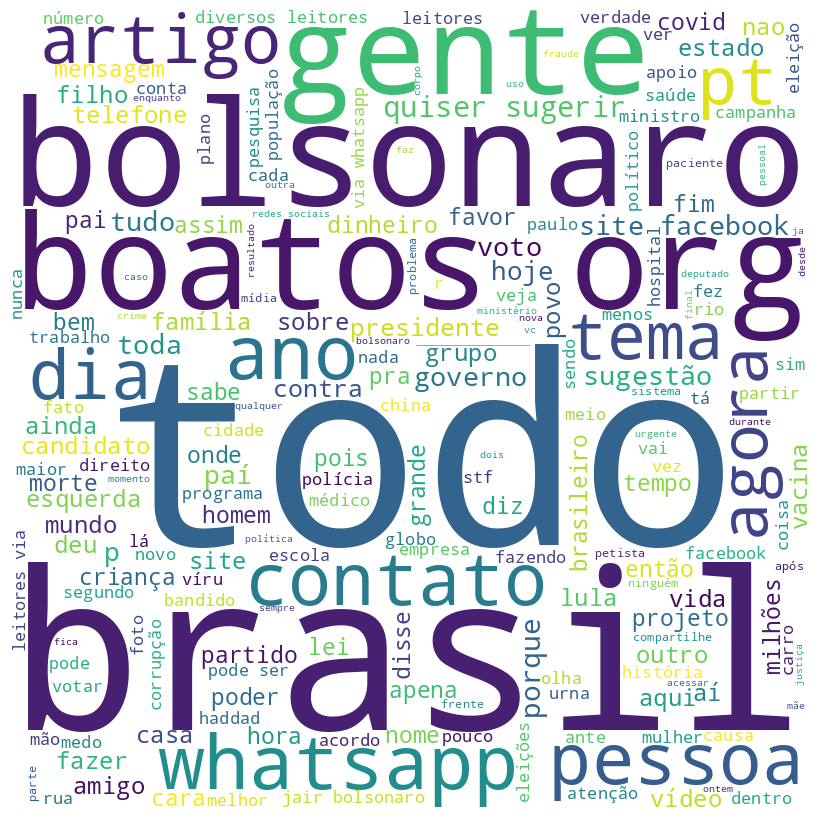

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import stop_words
text = fake[fake["misinformation"] == 1].copy()
text
message_words = ' '
tokens=[]
stopwords = set(stop_words.get_stop_words('portuguese')+["é"])
for val in text.text:
   val = str(val)
   tokens += val.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(" ".join(tokens))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#WordCloud para não Fake News

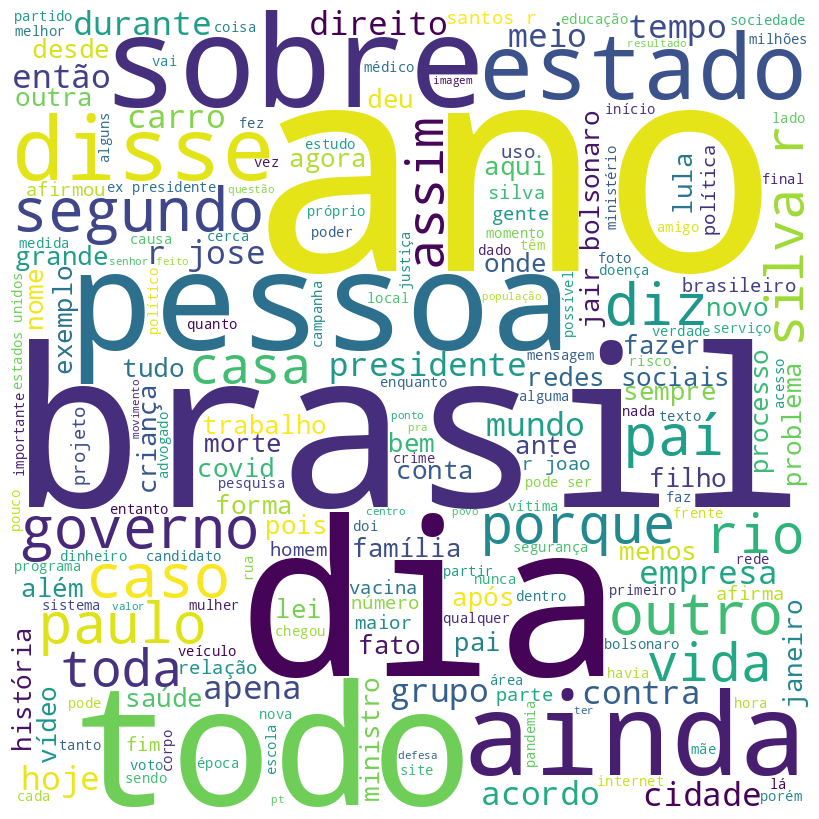

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import stop_words
text = fake[fake["misinformation"] == 0].copy()
text
message_words = ' '
tokens=[]
stopwords = set(stop_words.get_stop_words('portuguese') + ['é'])
for val in text.text:
   val = str(val)
   tokens += val.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(" ".join(tokens))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#Separar o dado em conjuntos de treino, validação e teste.
Os dados de teste e validação serão submetidos à um filtro de similaridade para garantir a uncidade dos membros dos conjuntos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(list(fake['text']))
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
def remove_similar_strings(input_list, threshold, similarity_matrix):

    indices_to_remove = list()
    pair_index = list()
    similars_dict = {}
    for i in range(len(similarity_matrix)):
      similars_dict[i] = 0
    for i in range(len(similarity_matrix)):

        for j in range(i+1, len(similarity_matrix)):
            if similarity_matrix[i, j] >= threshold:
                similars_dict[i] += 1
                #similars_dict[j] += 1
                #indices_to_remove.append(i)
                pair_index.append((i, j, similarity_matrix[i, j]))
                break

    #filtered_list = [(input_list[i], i) for i in range(len(input_list)) if i not in indices_to_remove]
    filtered_list = []
    for key in similars_dict:
      if similars_dict[key] == 0:
        filtered_list.append((input_list[key], key))
    return filtered_list, pair_index
filtered_list, pair_index = remove_similar_strings(input_list = list(fake['text']), threshold = 0.26, similarity_matrix = similarity_matrix)
#for i in range(0, 50):
#  filtered_list, pair_index = remove_similar_strings(input_list = list(fake['text']), threshold = 0.24 + i/100, similarity_matrix = similarity_matrix)
#  if fake.iloc[[x[1] for x in filtered_list]]["misinformation"].value_counts()[1] >= int(fake.shape[0]/10) and fake.iloc[[x[1] for x in filtered_list]]["misinformation"].value_counts()[0] >= int(fake.shape[0]/10):
#    print(0.24 + i/100)
#    break

0.26


In [ ]:
#print(len(filtered_list), len(filtered_list2))
#if filtered_list == filtered_list2:
#  print("???")

In [ ]:
#pair_index.sort(key = lambda x: x[2])

In [ ]:
#for pair in pair_index:
#  if pair[2] < 0.86:
#    print(pair)
#    print(test['text'].iloc[pair[0]], f"\n-----------------{pair[2]}\n" ,test['text'].iloc[pair[1]])

In [ ]:
filtered_text = pd.DataFrame({"name": [], "text": [], "misinformation": []})#, "origin": []})
for text, index in filtered_list:
  filtered = [
    fake.iloc[index].name,
    fake["text"].iloc[index],
    fake["misinformation"].iloc[index],
    #fake["origin"].iloc[index]
  ]
  filtered_text.loc[filtered_text.shape[0]] = filtered
filtered_text["misinformation"].value_counts()

1    2348
0    1741
Name: misinformation, dtype: int64

In [ ]:
#test = pd.read_csv("drive/MyDrive/fake_test.csv")
#validate =  pd.read_csv("drive/MyDrive/fake_validate.csv")
#train =  pd.read_csv("drive/MyDrive/fake_train.csv")


In [ ]:
#test_validation = pd.concat([test, validate])
#for index, row in filtered_text.iterrows():
#  if row["text"] not in list(test_validation["text"].values):
#    print(index)
#
#test_indexed = pd.DataFrame({"text": [], "misinformation": [], "origin": [], "index": []})
#validate_indexed = pd.DataFrame({"text": [], "misinformation": [], "origin": [], "index": []})
#train_indexed = pd.DataFrame({"text": [], "misinformation": [], "origin": [], "index": []})
#
#for index, row in test.iterrows():
#  indexed = [
#    test["text"].iloc[index],
#    test["misinformation"].iloc[index],
#    str(fake[fake["text"] == row["text"]].iloc[0]["origin"]),
#    int(fake[fake["text"] == row["text"]].index[0])
#  ]
#  test_indexed.loc[test_indexed.shape[0]] = indexed
#
#for index, row in validate.iterrows():
#  indexed = [
#    validate["text"].iloc[index],
#    validate["misinformation"].iloc[index],
#    str(fake[fake["text"] == row["text"]].iloc[0]["origin"]),
#    int(fake[fake["text"] == row["text"]].index[0])
#  ]
#  validate_indexed.loc[validate_indexed.shape[0]] = indexed
#
#for index, row in train.iterrows():
#  indexed = [
#    train["text"].iloc[index],
#    train["misinformation"].iloc[index],
#    str(fake[fake["text"] == row["text"]].iloc[0]["origin"]),
#    int(fake[fake["text"] == row["text"]].index[0])
#  ]
#  train_indexed.loc[train_indexed.shape[0]] = indexed
#
#test_indexed.to_csv("drive/MyDrive/fake_test_indexed.csv")
#validate_indexed.to_csv("drive/MyDrive/fake_validate_indexed.csv")
#train_indexed.to_csv("drive/MyDrive/fake_train_indexed.csv")

976


In [ ]:
test_validation_fake = fake.iloc[filtered_text[filtered_text["misinformation"] == 1]["name"].iloc[np.random.choice(filtered_text[filtered_text["misinformation"] == 1].shape[0], size=int(fake.shape[0]/10), replace=False)]]
test_validation_not_fake =  fake.iloc[filtered_text[filtered_text["misinformation"] == 0]["name"].iloc[np.random.choice(filtered_text[filtered_text["misinformation"] == 0].shape[0], size=int(fake.shape[0]/10), replace=False)]]
test_validation_fake = test_validation_fake.iloc[:,-2:]
test_validation_not_fake = test_validation_not_fake.iloc[:,-2:]

,text,misinformation
5723,Petistas já foram denunciados no 'Mensalinho d...,0
3500,segue o santinho e o link e yuma pesquisa para...,0
4360,"AOS TOCANTINENSES.\n\nO Policial Federal, Farl...",0
10043,"Comercial marcante dos anos 90, o tio Sukita, ...",0
11554,"Russell Wilson tem só 26 anos, mas é um precoc...",0
...,...,...
2467,*O primeiro debate entre os presidenciáveis se...,0
5871,Alguém sabe me dizer se o feriado de sexta fei...,0
2861,Como é que um IMBECIL desse diz uma barbaridad...,0
485,Direita Opressora chega na UFT e no IFTO de Pa...,0


In [ ]:
test = test_validation_fake.iloc[:842]
test = pd.concat([test, test_validation_not_fake[:842]])
test["index"] = [row.name for index, row in test.iterrows()]
#test.to_csv("drive/MyDrive/fake_test_balanced_indexed.csv")
test["text"].isin(filtered_text["text"].values)

,text,misinformation,index
3722,O PT convocou todos os macumbeiros do Brasil e...,1,3722
16059,"“Bem, acredito que esteje tudo bem com você, a...",1,16059
13247,“Laudo médico rompimento da artéria devido o e...,1,13247
11255,… Já está sendo vendida em outros Estados e es...,1,11255
15979,Na Argentina ta tudo normal! STF da Argentina ...,1,15979
...,...,...,...
6283,￼\n\nGeneral Paulo Chagas alerta Ciro Gomes\n\...,0,6283
6707,moradores da cidade argentina santiago del est...,0,6707
4081,Montes claros parou pra gritar 17.\nÉ só o com...,0,4081
14727,A atriz da Globo teve um vídeo vazado na inter...,0,14727


In [ ]:
validate = test_validation_fake.iloc[842:]
validate = pd.concat([validate, test_validation_not_fake[842:]])
validate["index"] = [row.name for index, row in validate.iterrows()]
#validate.to_csv("drive/MyDrive/fake_validate_balanced_indexed.csv")
validate

,text,misinformation,index
15598,DOAÇÃO DE 700 GELADEIRAS Campanha Solidária da...,1,15598
15136,"Tenho que confessar, Bill Gates realmente é um...",1,15136
1982,"Galera, bora tomo mundo votar BOLSONARO na pag...",1,1982
14477,Olha o que o meteoro q caiu na região de Paran...,1,14477
16,"☝🏻 não sei de quem é esse áudio, também não es...",1,16
...,...,...,...
2467,*O primeiro debate entre os presidenciáveis se...,0,2467
5871,Alguém sabe me dizer se o feriado de sexta fei...,0,5871
2861,Como é que um IMBECIL desse diz uma barbaridad...,0,2861
485,Direita Opressora chega na UFT e no IFTO de Pa...,0,485


In [ ]:
test = test_validation.iloc[1684:, -2:]
#test.to_csv("drive/MyDrive/fake_test.csv")
test["misinformation"].value_counts()

1    972
0    712
Name: misinformation, dtype: int64

In [ ]:
validate = test_validation.iloc[:1684, -2:]
#validate.to_csv("drive/MyDrive/fake_validate.csv")
validate

,text,misinformation
3062,EM NOME DE JESUS CRISTO! GLÓRIA A DEUS! Médico...,1
1438,"Por causa da hiperinflação, alimentos para cãe...",0
304,Há 25 anos Chico Anisio já dizia que a imprens...,0
905,+55 989908303 ANILDOLIMA ATENÇÃO PARA TODOS ...,1
1365,Flavio Bolsonaro 177 Senador_RJ (@FlavioBolson...,0
...,...,...
2120,"“Ex Governador Jacques Wagner vulgo “Rolex”, f...",1
1769,Somos um movimento formado com o intuito de in...,1
460,Este Matt Sandy está escrevendo contra Bolsona...,0
3266,Bolsonaro diz que só participará de debates no...,1


In [ ]:
train = pd.DataFrame(fake.drop(test_validation["name"])).iloc[:, -2:]
#train.to_csv("drive/MyDrive/fake_train.csv")
train
#train = pd.DataFrame(fake.drop(pd.concat([test, validate])["index"])).iloc[:, -2:]
#train["index"] = [row.name for index, row in train.iterrows()]
##train.to_csv("drive/MyDrive/fake_train_balanced_indexed.csv")
#train

,text,misinformation,index
2,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,2
3,"O Brasil que eu quero, é um Brasil com mais FR...",0,3
4,Já que a GLOBO não mostra...\n\n*BOLSONARO HOJ...,0,4
5,Como são as coisas.\nChefe do jacaré aparece n...,1,5
7,Há informações fidedignas que o desmoralizado ...,1,7
...,...,...,...
16770,Brasileiros comemoram aposentadoria expressa d...,1,16770
16771,MST invade faixa olímpica e declara latifúndio...,1,16771
16776,Lula assume Ministério da Defesa e promete tre...,1,16776
16790,Pedreiro instala privadas como assentos em pon...,0,16790


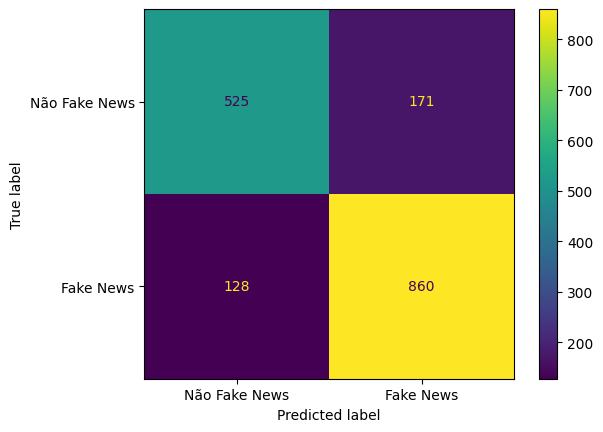

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from transformers import pipeline
classifier = pipeline(task="text-classification", model=model, top_k=None, tokenizer=tokenizer)
classify_all = classifier(list(test["text"].values))

pred_labels = []
for classification in classify_all:
  label0 = 0
  label1 = 0
  for label in classification:
    if label["label"] == "LABEL_0":
      label0=label["score"]
    if label["label"] == "LABEL_1":
      label1=label["score"]
  if label0 > label1:
    pred_labels.append(0)
  else:
    pred_labels.append(1)

confusion_matrix = metrics.confusion_matrix(test["misinformation"].values, pred_labels)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Não Fake News", "Fake News"])

cm_display.plot()
plt.show()

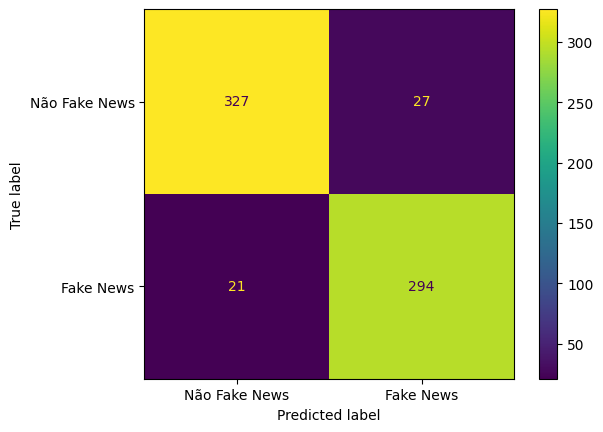

In [ ]:
#old_test = pd.read_csv("drive/MyDrive/test_fake.csv")
##classifier = pipeline(task="text-classification", model=model, top_k=None, tokenizer=tokenizer)
#classify_all_old = classifier(list(old_test["text"].values))
#
#pred_labels = []
#for classification in classify_all_old:
#  label0 = 0
#  label1 = 0
#  for label in classification:
#    if label["label"] == "LABEL_0":
#      label0=label["score"]
#    if label["label"] == "LABEL_1":
#      label1=label["score"]
#  if label0 > label1:
#    pred_labels.append(0)
#  else:
#    pred_labels.append(1)

confusion_matrix = metrics.confusion_matrix(test["misinformation"].values, pred_labels)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Não Fake News", "Fake News"])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["0", "1"]
print(classification_report(test["misinformation"].map(lambda x: str(x)).values, [ str(x) for x in pred_labels], target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       696
           1       0.83      0.87      0.85       988

    accuracy                           0.82      1684
   macro avg       0.82      0.81      0.82      1684
weighted avg       0.82      0.82      0.82      1684



In [ ]:
train["misinformation"].value_counts()

0    6940
1    6540
Name: misinformation, dtype: int64

In [ ]:
metrics.precision_recall_fscore_support(test["misinformation"].values, actual_labels, average=None, labels=[0, 1])

(array([0.87790698, 0.84      ]),
 array([0.85310734, 0.86666667]),
 array([0.86532951, 0.853125  ]),
 array([354, 315]))

In [ ]:
metrics.accuracy_score(test["misinformation"].values, actual_labels, normalize=True)


0.85949177877429

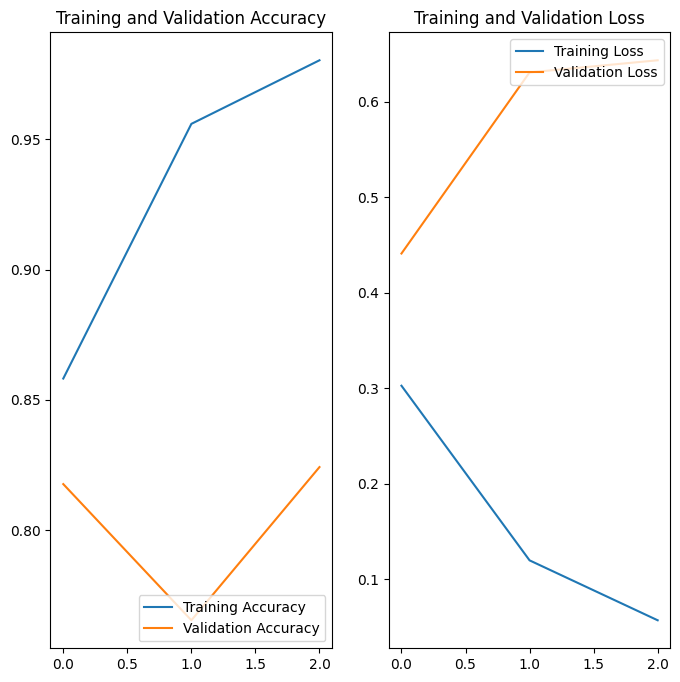

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs_range = range(3)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("drive/MyDrive/fake2_mode.pkl")

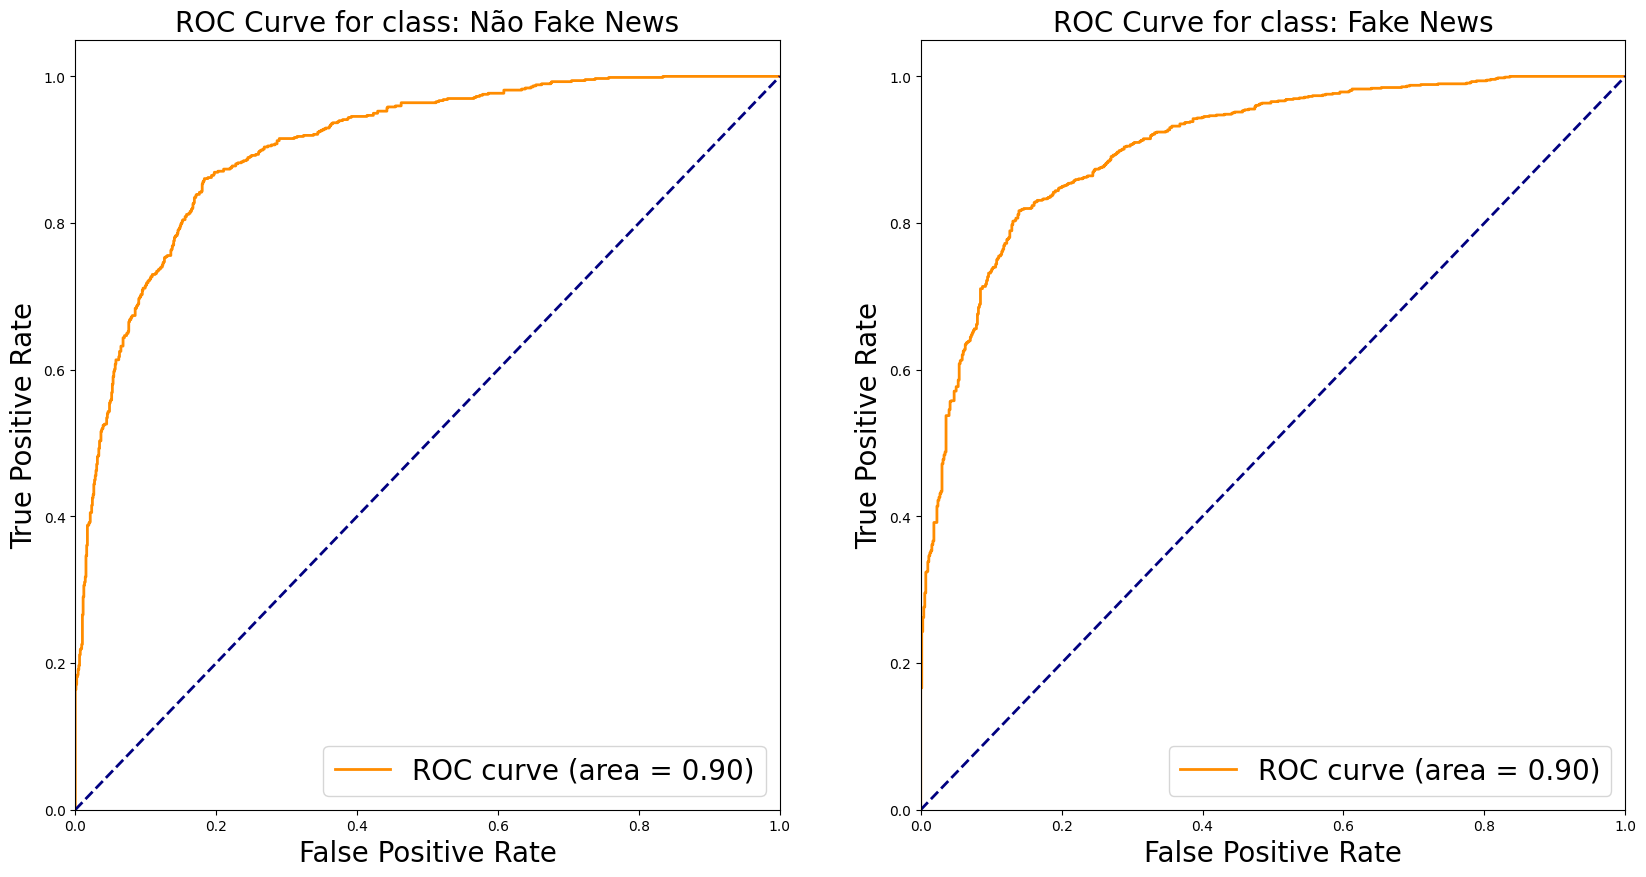

In [ ]:
from sklearn.metrics import roc_curve, auc

y_true = np.empty([test.shape[0], 2])
y_pred = np.empty([test.shape[0], 2])
pred_labels = []
for classification in classify_all:
  label0 = 0
  label1 = 0
  for label in classification:
    if label["label"] == "LABEL_0":
      label0=label["score"]
    if label["label"] == "LABEL_1":
      label1=label["score"]
  pred_labels.append([label0, label1])
# Generate predictions on the test set
for i in range(test.shape[0]):
    prog = ' Progress: '+str(i+1)+'/'+str(test.shape[0])
    y_true[i,:] = [0, 1] if test["misinformation"].iloc[i] == 1 else [1, 0]
    y_pred[i,:] = pred_labels[i]

fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()

# Compute False Positive and True Positive Rates for each class
for i in range(0, 2):
  fpr[i], tpr[i], thresholds[i] = roc_curve(y_true[:, i], y_pred[:, i], drop_intermediate=False)
  roc_auc[i] = auc(fpr[i], tpr[i])
classes = ["Não Fake News", "Fake News"]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(0, 2):
  ax[i].plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
  ax[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  ax[i].set_xlim([0.0, 1.0])
  ax[i].set_ylim([0.0, 1.05])
  ax[i].set_xlabel('False Positive Rate', fontsize=20)
  ax[i].set_ylabel('True Positive Rate', fontsize=20)
  ax[i].set_title('ROC Curve for class: '+classes[i], fontsize=20)
  ax[i].legend(loc="lower right", prop={'size': 20})

In [ ]:
J_stats = [None]*2
opt_thresholds = [None]*2

# Compute Youden's J Statistic for each class
for i in range(2):
    J_stats[i] = tpr[i] - fpr[i]
    opt_thresholds[i] = thresholds[i][np.argmax(J_stats[i])]
    print('Optimum threshold for '+classes[i]+': '+str(opt_thresholds[i]))

Optimum threshold for Não Fake News: 0.12640096247196198
Optimum threshold for Fake News: 0.874776303768158


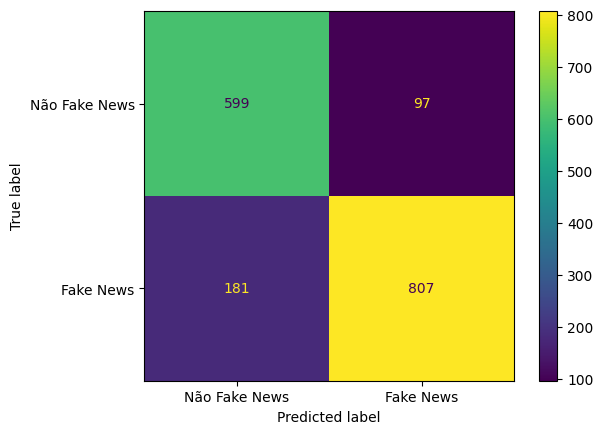

In [ ]:
pred_labels_new = []
uncertain = []
for i, classification in enumerate(classify_all):
  label0 = 0
  label1 = 0
  for label in classification:
    if label["label"] == "LABEL_0":
      label0=label["score"]
    if label["label"] == "LABEL_1":
      label1=label["score"]
  if label0 >= opt_thresholds[0]:
    pred_labels_new.append(0)
  elif label1 >= opt_thresholds[1]:
    pred_labels_new.append(1)
  else:
    uncertain.append(i)

confusion_matrix = metrics.confusion_matrix([x for i, x in enumerate(test["misinformation"].values) if i not in uncertain], pred_labels_new)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Não Fake News", "Fake News"])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["0", "1"]
print(classification_report([str(x) for i, x in enumerate(test["misinformation"].values) if i not in uncertain], [str(x1) for x1 in pred_labels_new], target_names=target_names, digits=10))

              precision    recall  f1-score   support

           0  0.7679487179 0.8606321839 0.8116531165       696
           1  0.8926991150 0.8168016194 0.8530655391       988

    accuracy                      0.8349168646      1684
   macro avg  0.8303239165 0.8387169017 0.8323593278      1684
weighted avg  0.8411395685 0.8349168646 0.8359497160      1684



In [ ]:
from sklearn.metrics import classification_report
target_names = ["0", "1"]
print(classification_report([str(x) for x in test["misinformation"].values], [str(x1) for x1 in actual_labels], target_names=target_names))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       696
           1       0.88      0.78      0.83       988

    accuracy                           0.81      1684
   macro avg       0.81      0.81      0.81      1684
weighted avg       0.82      0.81      0.81      1684

